In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing the Libraries**

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from string import punctuation
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Importing the data**

In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/Movie-sentiment-analysis/movie_reviews.csv")

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.shape

**Bar graph demonstrating the distribution of Movie Ratings**

In [ ]:
# Count the occurrences of each rating
rating_counts = data['Rating'].value_counts().sort_index()\

In [ ]:
labels = np.array([ '1', '2', '3', '4', '7', '8', '9', '10'])
# Create a bar plot
plt.bar(labels, rating_counts, color='blue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Movie Ratings')
plt.show()

**Preprocessing Train Dataset**

In [5]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
# Get the list of English stopwords from NLTK
stop_words = set(stopwords.words('english'))
# Function to perform cleaning, tokenization, stopwords removal, and lemmatization
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuation])
    text = text.replace('<br>', ' ')
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the lemmatized tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text
data['Comment'] = data['Comment'].apply(preprocess_text)

**Vectorization of Data**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
X = data.iloc[:,2]
y = data.iloc[:,1]

In [7]:
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X)

**Preprocessing on Test Dataset**

In [8]:
test_data = pd.read_csv("/content/gdrive/MyDrive/Movie-sentiment-analysis/movie_reviews_test.csv")
test_comment = test_data.iloc[:,2]
test_rating = test_data.iloc[:,1]
test_comment = test_comment.apply(preprocess_text)
test_comment_tfidf = tfidf_vectorizer.fit_transform(test_comment)

**Model Building - Training and Testing**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y)
y_pred_rfc = random_forest_classifier.predict(test_comment_tfidf)
print(classification_report(test_rating, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.38      0.48      0.42      5022
           2       0.71      0.01      0.01      2302
           3       0.14      0.00      0.01      2541
           4       0.54      0.05      0.09      2635
           7       0.70      0.06      0.11      2307
           8       0.10      0.02      0.03      2850
           9       0.06      0.00      0.00      2344
          10       0.24      0.84      0.37      4999

    accuracy                           0.28     25000
   macro avg       0.36      0.18      0.13     25000
weighted avg       0.34      0.28      0.19     25000



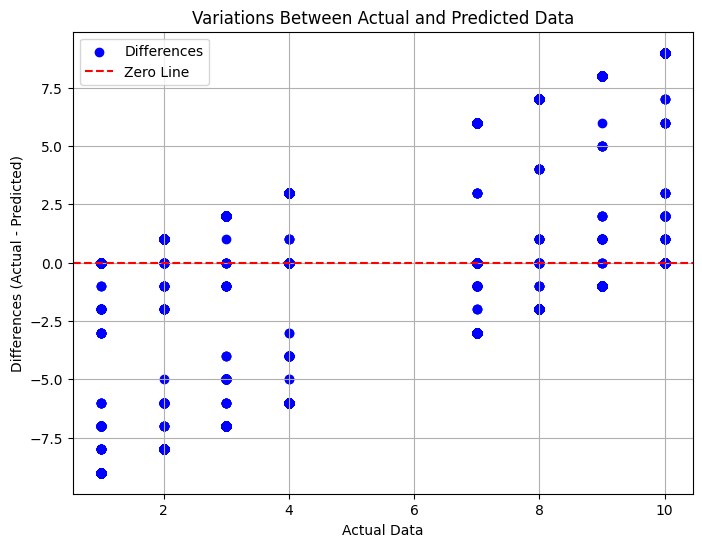

In [22]:
actual_data = test_rating.to_numpy()
predicted_data = np.array(y_pred_rfc)
differences = actual_data - predicted_data

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_data, differences, color='blue', label='Differences')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Actual Data')
plt.ylabel('Differences (Actual - Predicted)')
plt.title('Variations Between Actual and Predicted Data')
plt.legend()
plt.grid(True)
plt.show()


**Testing using Different Models - Naive Bayes,SVM linear, SVM rbf, Gradient Boosting Classifier,Neural Networks, Logistic Regression**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y)
y_pred_nb = classifier.predict(test_comment_tfidf)
print(classification_report(test_rating, y_pred_nb))

              precision    recall  f1-score   support

           1       0.36      0.17      0.23      5022
           2       0.14      0.07      0.09      2302
           3       0.12      0.06      0.08      2541
           4       0.14      0.16      0.15      2635
           7       0.12      0.16      0.13      2307
           8       0.14      0.45      0.21      2850
           9       0.11      0.09      0.09      2344
          10       0.29      0.16      0.21      4999

    accuracy                           0.17     25000
   macro avg       0.17      0.16      0.15     25000
weighted avg       0.20      0.17      0.16     25000



In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y)
y_pred_svm = svm_classifier.predict(test_comment_tfidf)
print(classification_report(test_rating, y_pred_svm))

              precision    recall  f1-score   support

           1       0.32      0.38      0.35      5022
           2       0.13      0.07      0.09      2302
           3       0.12      0.07      0.09      2541
           4       0.14      0.23      0.18      2635
           7       0.16      0.09      0.12      2307
           8       0.14      0.29      0.19      2850
           9       0.12      0.03      0.04      2344
          10       0.29      0.26      0.27      4999

    accuracy                           0.21     25000
   macro avg       0.18      0.18      0.17     25000
weighted avg       0.20      0.21      0.20     25000



In [ ]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_tfidf, y)
y_pred_svm_rbf = svm_classifier.predict(test_comment_tfidf)
print(classification_report(test_rating, y_pred_svm_rbf))

              precision    recall  f1-score   support

           1       0.34      0.47      0.39      5022
           2       0.26      0.01      0.02      2302
           3       0.13      0.02      0.03      2541
           4       0.16      0.20      0.18      2635
           7       0.24      0.04      0.08      2307
           8       0.15      0.22      0.18      2850
           9       0.17      0.00      0.00      2344
          10       0.26      0.51      0.35      4999

    accuracy                           0.25     25000
   macro avg       0.21      0.18      0.15     25000
weighted avg       0.23      0.25      0.20     25000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_tfidf, y)
y_pred_gb = gb_classifier.predict(test_comment_tfidf)
print(classification_report(test_rating, y_pred_gb))

              precision    recall  f1-score   support

           1       0.41      0.38      0.40      5022
           2       0.44      0.05      0.08      2302
           3       0.13      0.02      0.04      2541
           4       0.27      0.10      0.15      2635
           7       0.28      0.11      0.15      2307
           8       0.13      0.12      0.13      2850
           9       0.07      0.01      0.02      2344
          10       0.24      0.72      0.36      4999

    accuracy                           0.26     25000
   macro avg       0.25      0.19      0.17     25000
weighted avg       0.26      0.26      0.21     25000



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  # Adjust the number of classes (10 here) based on the dataset
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_tfidf.toarray(), y, epochs=10, batch_size=32, validation_split=0.1)
loss, accuracy = model.evaluate(test_comment_tfidf.toarray(), test_rating)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/10
704/704 [==============================] - 9s 12ms/step - loss: 1.7626 - accuracy: 0.3396 - val_loss: 1.5002 - val_accuracy: 0.4240
Epoch 2/10
704/704 [==============================] - 9s 13ms/step - loss: 1.4238 - accuracy: 0.4440 - val_loss: 1.4951 - val_accuracy: 0.4316
Epoch 3/10
704/704 [==============================] - 9s 13ms/step - loss: 1.2986 - accuracy: 0.4896 - val_loss: 1.4502 - val_accuracy: 0.4460
Epoch 4/10
704/704 [==============================] - 8s 11ms/step - loss: 1.1919 - accuracy: 0.5299 - val_loss: 1.5177 - val_accuracy: 0.4316
Epoch 5/10
704/704 [==============================] - 9s 13ms/step - loss: 1.0874 - accuracy: 0.5779 - val_loss: 1.7203 - val_accuracy: 0.4112
Epoch 6/10
704/704 [==============================] - 8s 11ms/step - loss: 0.9718 - accuracy: 0.6248 - val_loss: 1.6991 - val_accuracy: 0.4096
Epoch 7/10
704/704 [==============================] - 9s 13ms/step - loss: 0.8626 - accuracy: 0.6720 - val_loss: 1.8113 - val_accuracy: 0.4140

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_tfidf, y)
y_pred_lr = logreg_model.predict(test_comment_tfidf)
print(classification_report(test_rating, y_pred_lr))

              precision    recall  f1-score   support

           1       0.34      0.42      0.38      5022
           2       0.15      0.05      0.08      2302
           3       0.12      0.04      0.06      2541
           4       0.16      0.20      0.18      2635
           7       0.20      0.09      0.13      2307
           8       0.15      0.29      0.20      2850
           9       0.13      0.03      0.05      2344
          10       0.27      0.36      0.31      4999

    accuracy                           0.23     25000
   macro avg       0.19      0.19      0.17     25000
weighted avg       0.21      0.23      0.21     25000

